## Corpus Stats

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
corpus = pd.read_csv('corpus.csv.gz', compression='gzip')

In [2]:
list(corpus.columns.values)

['Unnamed: 0',
 '_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'qual_a_melhor_classificao_para_esse_texto',
 'qual_a_melhor_classificao_para_esse_texto:confidence',
 'authorid',
 'blogid',
 'content',
 'contentcount',
 'date',
 'firstpart',
 'labels',
 'me',
 'polarity',
 'postid',
 'published',
 'qual_a_melhor_classificao_para_esse_texto_gold',
 'readmore',
 'replies',
 'rownum',
 'title',
 'titlecount',
 'wpscount',
 'year']

## Contagem

In [3]:
blogs = corpus[['blogid']].groupby(['blogid'])
autores = corpus[['authorid']].groupby(['authorid'])
postagens = corpus[['postid']].groupby(['postid'])
print('Total do Corpus: %i' %len(corpus))
print('Postagens: %i' %len(postagens))
print('Blogs: %i' %len(blogs))
print('Autores: %i' %len(autores))

Total do Corpus: 1064
Postagens: 1000
Blogs: 972
Autores: 972


In [4]:
corpus[['postid','qual_a_melhor_classificao_para_esse_texto']].groupby(['qual_a_melhor_classificao_para_esse_texto']).agg(['count'])

,postid
,count
qual_a_melhor_classificao_para_esse_texto,
diario,672
outro,392


In [5]:
confidence = corpus[['postid','qual_a_melhor_classificao_para_esse_texto:confidence']].groupby(['qual_a_melhor_classificao_para_esse_texto:confidence']).agg(['count'])
confidence['postid'].sort_values('count',ascending=False).head(5)

,count
qual_a_melhor_classificao_para_esse_texto:confidence,
1.0000,551
0.6667,11
0.6500,7
0.6707,7
0.6557,5


In [6]:
corpus[['postid','_golden']].groupby(['_golden']).agg(['count'])

,postid
,count
_golden,
False,1019
True,45


In [7]:
corpus[['postid','_trusted_judgments']].groupby(['_trusted_judgments']).agg(['count']).head(3)

,postid
,count
_trusted_judgments,
3,916
4,85
6,2


## LIWC Stats

In [8]:
from liwc import LIWC
liwc_class = LIWC()

In [9]:
#mtx = liwc_class.build_features(corpus['content'])
columns = ['funct','pronoun','ppron','i','we','you','shehe','they','ipron','article','verb','auxverb','past','present','future','adverb','preps','conj','negate','quant','number','swear','social','family','friend','humans','affect','posemo','negemo','anx','anger','sad','cogmech','insight','cause','discrep','tentat','certain','inhib','incl','excl','percept','see','hear','feel','bio','body','health','sexual','ingest','relativ','motion','space','time','work','achieve','leisure','home','money','relig','death','assent','nonfl','filler']
#df_liwc = pd.DataFrame(mtx, columns=columns)
#df_liwc.to_csv('corpus_liwc_mtx.csv.gz', compression='gzip')
df_liwc = pd.read_csv('corpus_liwc_mtx.csv.gz', compression='gzip')

In [10]:
df_liwc['class'] = corpus['qual_a_melhor_classificao_para_esse_texto']
df_liwc['confidence'] = corpus['qual_a_melhor_classificao_para_esse_texto:confidence']

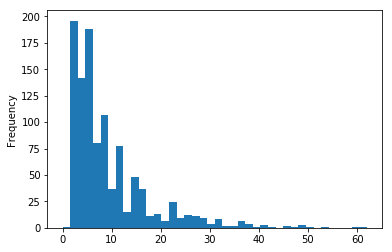

In [11]:
%matplotlib inline
df_liwc['i'].plot.hist(bins=40)

In [12]:
diario = df_liwc[df_liwc['class'] == 'diario']
outro = df_liwc[df_liwc['class'] == 'outro']

In [13]:
stats = pd.DataFrame(data={'diario_mean': diario.mean(axis=0)}, index=columns)
stats['diario_std'] = diario.std(axis=0)
stats['outro_mean'] = outro.mean(axis=0)
stats['outro_std'] = outro.std(axis=0)

## Significance Test

In [14]:
significance = []
for column in list(stats.index.values):
    a = diario[column]
    b = outro[column]
    t, p = ttest_ind(a, b, equal_var=False)
    significance.append(p > 0.05)

In [15]:
stats['significance'] = significance
stats_signify = stats[stats.significance == True]
stats_signify

,diario_mean,diario_std,outro_mean,outro_std,significance
past,15.406250,13.167051,14.512755,11.171064,True
adverb,14.162202,9.800949,14.369898,10.318628,True
negate,6.443452,5.638891,6.428571,5.473489,True
number,5.723214,4.709207,6.331633,5.210870,True
family,1.369048,2.689738,1.454082,2.927589,True
friend,2.747024,3.165809,2.494898,2.767176,True
humans,25.440476,17.003095,26.709184,18.361589,True
anx,1.830357,2.396800,1.783163,2.332122,True
sad,3.882440,3.966272,3.887755,3.750213,True
percept,21.793155,15.242415,23.135204,15.607710,True
